In [98]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [99]:
# Loading Training data
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (2).csv


In [100]:
import io
trainn = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [101]:
# Loading Testing data
from google.colab import files
uplo = files.upload()

Saving test.csv to test (2).csv


In [102]:
testt = pd.read_csv(io.BytesIO(uplo['test.csv']))

In [103]:
trainn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
testt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
trainn.shape

(891, 12)

In [106]:
testt.shape

(418, 11)

Training dataset has 891 rows and 12 columns including Target variable i.e. survived column. Testing dataset has 418 rows and 11 columns excluding survived column which we have to predict

In [107]:
trainn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have 891 entries but some columns (Age,Eabin,Embarked) have less than 891 entries. So, columns(Age, Cabin and Embarked) have missing values. So, We have to preprocess the data before training machine learning model. Same will apply to test data.

In [108]:
trainn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
#checking missing values
trainn.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
trainn.isna().sum()/len(trainn)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

As we can see, Cabin has approx 77% missing values. So we can drop the Cabin column. Age column has approx 20% missing values, We will impute these values. Embarked has 0.22% i.e. only 2 missing values, so, We can remove thoso two rows.

In [111]:
trainn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see, Some features(Age, SibSp, Parch, Fare) have numerical values and some(Survived, Pclass, Sex, Cabin, Embarked) have categorical values. Ticket is neither categorical nor numeric, we can drop that column

## Univariate Analysis

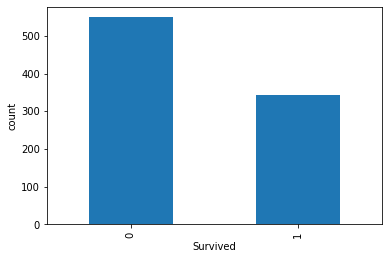

In [112]:
trainn.Survived.value_counts().plot(kind='bar',xlabel='Survived',ylabel='count')

In [113]:
pd.DataFrame(trainn.Survived.value_counts()/len(trainn)*100)

,Survived
0,61.616162
1,38.383838


As we can see from above graph and table, Most people died on ship(approx 62%)

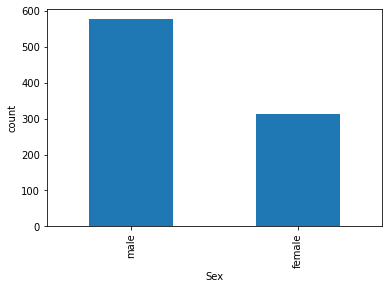

In [114]:
trainn.Sex.value_counts().plot(kind='bar',xlabel='Sex',ylabel='count')

In [115]:
pd.DataFrame(trainn.Sex.value_counts()/len(trainn)*100)

,Sex
male,64.758698
female,35.241302


Males are present in higher numbers on the Ship

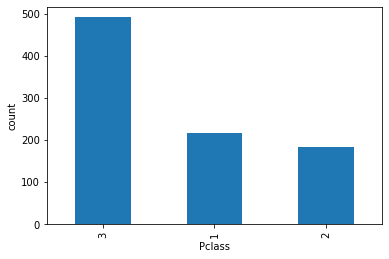

In [116]:
trainn.Pclass.value_counts().plot(kind='bar',xlabel='Pclass',ylabel='count')

In [117]:
pd.DataFrame(trainn.Pclass.value_counts()/len(trainn)*100)

,Pclass
3,55.106622
1,24.242424
2,20.650954


People from lower class are more on the Ship

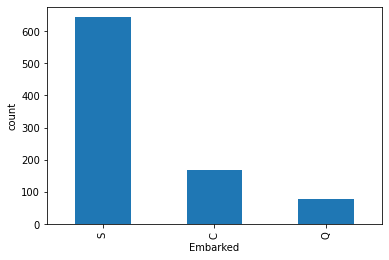

In [118]:
trainn.Embarked.value_counts().plot(kind='bar',xlabel='Embarked',ylabel='count')

In [119]:
pd.DataFrame(trainn.Embarked.value_counts()/len(trainn)*100)

,Embarked
S,72.278339
C,18.855219
Q,8.641975


Higher number of people board on the Ship from Southampton

## Bivariate Analysis

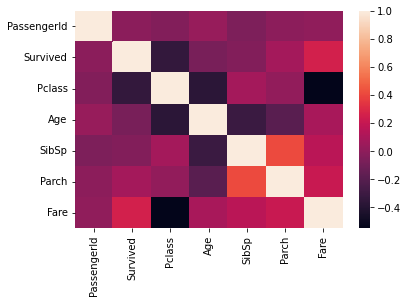

In [120]:
 #Correlation between numerical features
sns.heatmap(trainn.corr())

Here SibSp and Parch has higher correlation which means that parents mostly like to travel with their kids and spouses

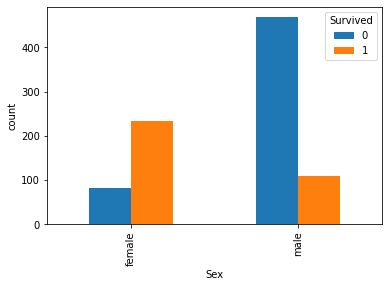

In [121]:
pd.crosstab(trainn.Sex,trainn.Survived).plot(kind='bar',ylabel='count')

In [122]:
pd.DataFrame(trainn.groupby(['Sex'])['Survived'].value_counts(normalize=True)*100)

Survived
Sex    Survived           
female 1         74.203822
       0         25.796178
male   0         81.109185
       1         18.890815

Out of total Females, 74% Females survived. Out of Males, 81% Males died. So, Females survival rate is high.

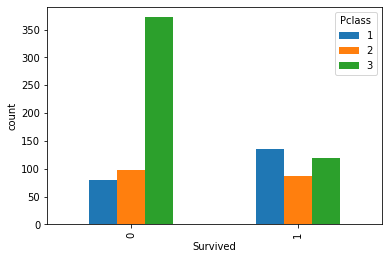

In [123]:
pd.crosstab(trainn.Survived,trainn.Pclass).plot(kind='bar',xlabel='Survived',ylabel='count')

As we can see, More number of people Survived who were present in Upper class and More number of people died who were present in Lower class

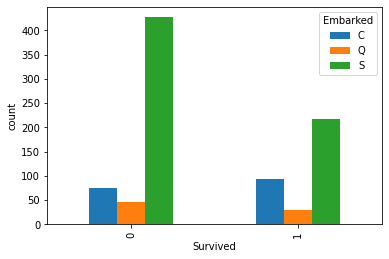

In [124]:

pd.crosstab(trainn.Survived,trainn.Embarked).plot(kind='bar',xlabel='Survived',ylabel='count')

As we can see, More number of people who boared from Southampton died and also survived because Highest number of people boarded from Southampton.

In [125]:
pd.pivot_table(trainn, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


1. Average Age of Survivor is 28 i.e. Young people will survive more.
2. People who paid higher fares will survive,this might be people of upper class.
3. Children who have parents have higher chance of survival.
4. Children who have siblings have lesser chance of survival.

## Data Preprocessing

In [126]:
# Dropping columns and rows

trainn.drop(columns=['Cabin'],inplace=True)
trainn.drop(columns=['Name'],inplace=True)
trainn.drop(columns=['PassengerId'],inplace=True)
trainn.drop(columns=['Ticket'],inplace=True)
trainn.dropna(subset=['Embarked'],inplace=True)

testt.drop(columns=['Cabin'],inplace=True)
testt.drop(columns=['Name'],inplace=True)
testt.drop(columns=['PassengerId'],inplace=True)
testt.drop(columns=['Ticket'],inplace=True)
testt.dropna(subset=['Embarked'],inplace=True)

In [127]:
# Filling Missing values by finding median after concatenating train and test data
data = pd.concat([trainn,testt])
avg = data.Age.median()
trainn.fillna(value={'Age':avg},inplace=True)
testt.fillna(value={'Age':avg},inplace=True)




In [128]:
trainn.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [129]:
testt.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [130]:
#fill missing value of fare column in test data
avg = data.Fare.median()
testt.fillna(value = {'Fare':avg},inplace=True)
testt.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [131]:
trainn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Age and Fare columns are in float datatypes, we have to convert all of these into int datatype

In [132]:
trainn['Age'] = np.round(trainn['Age']).astype(int)
testt['Age'] = np.round(testt['Age']).astype(int)

In [133]:
trainn['Age'].value_counts()

28    204
24     32
30     27
22     27
18     26
     ... 
12      1
74      1
53      1
66      1
0       1
Name: Age, Length: 71, dtype: int64

In [134]:
trainn['Fare'] = np.round(trainn['Fare']).astype(int)
testt['Fare'] = np.round(testt['Fare']).astype(int)

In [135]:
trainn.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7,S
1,1,1,female,38,1,0,71,C
2,1,3,female,26,0,0,8,S
3,1,1,female,35,1,0,53,S
4,0,3,male,35,0,0,8,S


In [136]:
# Converting categorical features to numeric
gender = {'male':1,'female':0}
trainn['Sex'] = trainn['Sex'].map(gender)

s_point = {'S':0,'C':1,'Q':2}
trainn['Embarked'] = trainn['Embarked'].map(s_point)

In [137]:
trainn.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,0
1,1,1,0,38,1,0,71,1
2,1,3,0,26,0,0,8,0
3,1,1,0,35,1,0,53,0
4,0,3,1,35,0,0,8,0


In [138]:
gender = {'male':1,'female':0}
testt['Sex'] = testt['Sex'].map(gender)

s_point = {'S':0,'C':1,'Q':2}
testt['Embarked'] = testt['Embarked'].map(s_point)

In [139]:
testt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,8,2
1,3,0,47,1,0,7,0
2,2,1,62,0,0,10,2
3,3,1,27,0,0,9,0
4,3,0,22,1,1,12,0


In [140]:
y = trainn[['Survived']]
x = trainn[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 30 )

In [147]:
from sklearn import preprocessing
# Standardizing the Training data
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_train = pd.DataFrame(x_scaled, columns=[x_train.columns])
x_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.555361,0.73641,0.115209,0.427356,-0.475480,0.370501,-0.594979
1,-1.555361,0.73641,0.496204,-0.482375,0.731900,9.262851,0.960279
2,0.820282,0.73641,0.801000,0.427356,4.354038,-0.093448,-0.594979
3,-1.555361,-1.35794,2.553575,0.427356,-0.475480,0.873112,-0.594979
4,-1.555361,0.73641,0.115209,-0.482375,-0.475480,0.331839,-0.594979
...,...,...,...,...,...,...,...
706,0.820282,-1.35794,-0.570581,-0.482375,-0.475480,-0.480072,-0.594979
707,0.820282,-1.35794,-0.646780,-0.482375,-0.475480,-0.480072,2.515538
708,0.820282,0.73641,0.039010,-0.482375,-0.475480,-0.480072,-0.594979
709,0.820282,0.73641,-0.037189,-0.482375,-0.475480,-0.480072,-0.594979


In [148]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_scaled, columns=[x_test.columns])
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.398836,-1.367833,-1.669163,-0.447214,2.341549,-0.079511,-0.468622
1,0.846651,-1.367833,-0.939957,-0.447214,-0.474638,-0.377469,1.199672
2,-1.644322,-1.367833,-0.777911,0.447214,-0.474638,1.534429,1.199672
3,0.846651,0.731083,-0.939957,-0.447214,-0.474638,-0.501619,-0.468622
4,0.846651,0.731083,-0.048705,-0.447214,-0.474638,-0.526449,-0.468622
...,...,...,...,...,...,...,...
173,0.846651,0.731083,-0.048705,-0.447214,-0.474638,-0.129171,2.867966
174,0.846651,-1.367833,0.923570,0.447214,-0.474638,-0.501619,-0.468622
175,0.846651,0.731083,0.599478,-0.447214,-0.474638,-0.551278,-0.468622
176,0.846651,0.731083,-1.993254,0.447214,0.933456,-0.451959,-0.468622


## Logistic Regression

In [157]:
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)
lr_y_pred = clf1.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)*100
print('Testing accuracy is:')
print(lr_accuracy)

Testing accuracy is:
79.7752808988764


In [156]:
#Checking overfitting or underfitting
lrr_y_pred = clf1.predict(x_train)
lrr_accuracy = accuracy_score(y_train, lrr_y_pred)*100
print('Training accuracy is:')
print(lrr_accuracy)

Training accuracy is:
80.45007032348805


Training accuracy and Testing accuracy is very much near to each other, so, our model is not overfitting or underfitting.

## KNN Classifier

In [168]:
clf2 = KNeighborsClassifier(5)
clf2.fit(x_train,y_train)
knn_y_pred = clf2.predict(x_test)
knn_accuracy = accuracy_score(y_test, lr_y_pred)*100
print(lr_accuracy)

79.7752808988764


## SVM

In [167]:
clf3 = svm.SVC()
clf3.fit(x_train,y_train)
svm_y_pred = clf3.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)*100
print(svm_accuracy)

82.58426966292134


## Random Forest

In [173]:
clf4 = RandomForestClassifier()
clf4.fit(x_train,y_train)
rf_y_pred = clf4.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print(rf_accuracy)

86.51685393258427


In [174]:
print('The accuracy of Logistic Regression is :',lr_accuracy)
print('The accuracy of KNN is :',knn_accuracy)
print('The accuracy of SVM is :',svm_accuracy)
print('The accuracy of Random Forest is :',rf_accuracy)

The accuracy of Logistic Regression is : 79.7752808988764
The accuracy of KNN is : 79.7752808988764
The accuracy of SVM is : 82.58426966292134
The accuracy of Random Forest is : 86.51685393258427
